# Visu example for Mikhail
* This notebook reads a surface temperature file and mask file from NEMO (1/60 resolution on regional domain over the mediterraneean)
* This code makes use of the xarray module, which is very convenient to open and deal with NEMO netcdf files. Check out the doc about it here:  http://xarray.pydata.org/en/stable/
* For plotting libraries, this code makes use of Matplotlib, which is the native python plotting libraries (check out the doc here: https://matplotlib.org/stable/ )
* Have fun!

## Modules to load

In [2]:
## standart libraries
import os,sys
import numpy as np

# xarray
import xarray as xr

# plot (matplotlib library)
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# This line if you uses jupyter notebooks
%matplotlib inline 

## direcories and file names of input files

In [13]:
# directories
diri     ='/Users/leroux/DATA/MEDWEST60_DATA/MEDWEST60-GSL14-S/ens01/1h/gridT-2D/'
dirimask = '/Users/leroux/DATA/MEDWEST60_DATA/MEDWEST60-I/'

# file names
fili     = '001MEDWEST60-GSL14-ens01_1h_20100302_20100306_gridT-2D_20100306-20100306.nc'
filimask = 'MEDWEST60_mask.nc4'

## read data

In [30]:

# longitude
nav_lon = xr.open_dataset(diri+fili)['nav_lon']

# latitude
nav_lat = xr.open_dataset(diri+fili)['nav_lat']

# datat
data   = xr.open_mfdataset(diri+fili,concat_dim='time_counter',decode_times=True)['sosstsst']

# mask
mask =  xr.open_dataset(dirimask+filimask)['tmask'][0,0,:,:]

## Explore data

* data is an xarray: an array with metadata (such as coordinates)

* you can have a quick look at its structure like this:

In [16]:
data

<xarray.DataArray 'sosstsst' (time_counter: 24, y: 803, x: 883)>
dask.array<shape=(24, 803, 883), dtype=float32, chunksize=(24, 803, 883)>
Coordinates:
    nav_lat        (y, x) float32 35.0235 35.0233 35.0232 35.023 35.0229 ...
    nav_lon        (y, x) float32 -5.68308 -5.66638 -5.64969 -5.63299 ...
    time_centered  (time_counter) datetime64[ns] dask.array<shape=(24,), chunksize=(24,)>
  * time_counter   (time_counter) datetime64[ns] 2010-03-06T00:30:00 ...
Dimensions without coordinates: y, x
Attributes:
    standard_name:       sea_surface_temperature
    long_name:           sea surface temperature
    units:               degC
    online_operation:    average
    interval_operation:  80 s
    interval_write:      1 h
    cell_methods:        time: mean (interval: 80 s)

* you can print a subset of values values like this :
(see the doc of xarray for more details)

In [22]:
data.isel(time_counter=10,y=slice(100,110),x=slice(200,205)).values

array([[ 15.70196152,  15.74800491,  15.81108189,  15.87615299,
         15.92568016],
       [ 15.70645237,  15.74921608,  15.80327034,  15.86031151,
         15.90534115],
       [ 15.70899296,  15.74347019,  15.78677368,  15.83441448,
         15.87309265],
       [ 15.70800781,  15.73536587,  15.77123928,  15.81062317,
         15.84378052],
       [ 15.70795441,  15.73471546,  15.76788425,  15.80204582,
         15.83368874],
       [ 15.71999931,  15.75135136,  15.7831707 ,  15.81406021,
         15.84382534],
       [ 15.75033951,  15.7813797 ,  15.80871677,  15.83480835,
         15.85887337],
       [ 15.78585339,  15.81032658,  15.83180904,  15.85169888,
         15.86815166],
       [ 15.81268215,  15.8303957 ,  15.84621716,  15.86009502,
         15.87155724],
       [ 15.82838726,  15.84089375,  15.85238457,  15.86246395,
         15.87186241]], dtype=float32)

###  you can produce a "quick and dirty plot" like this:

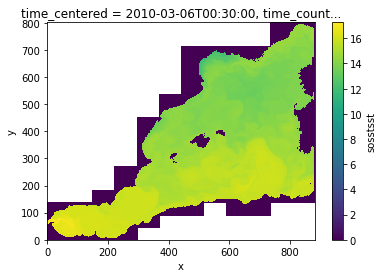

In [23]:
data.isel(time_counter=0).plot()

### Or you can  plot a customable plot like this:

*  Select the 2-d array to plot

In [31]:
data2plot = data.isel(time_counter=0).where(mask>0)

* Example 1: minimalist plot

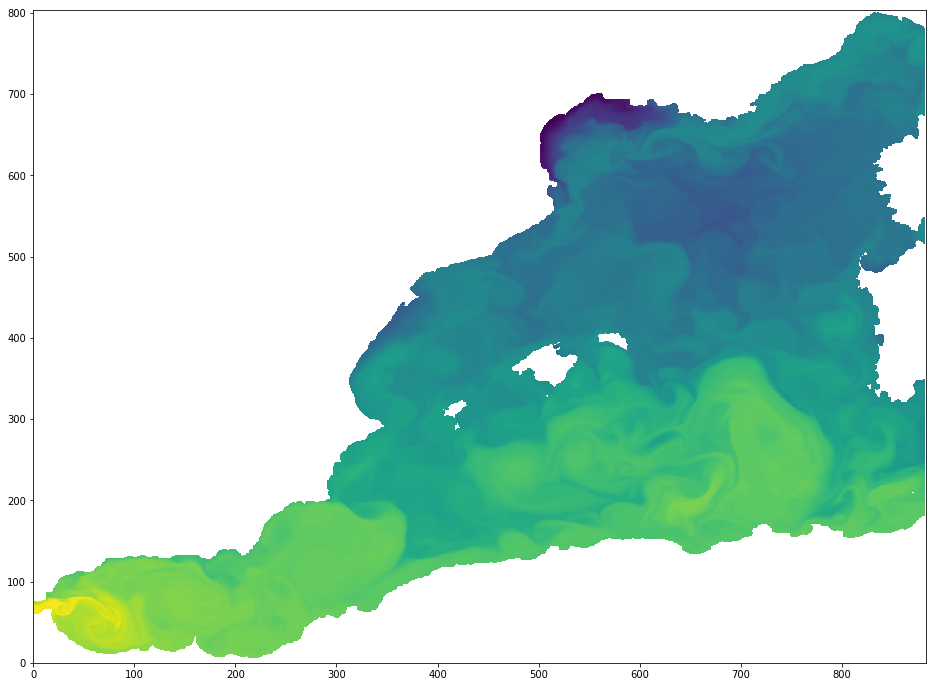

In [33]:
# Plot

fig,(ax) = plt.subplots(1, 1, figsize=[16, 12],facecolor='w')

cs  = ax.pcolormesh(data2plot)

plt.show()

* Example 2: cusmosize grid lines and colormap and add a colorbar

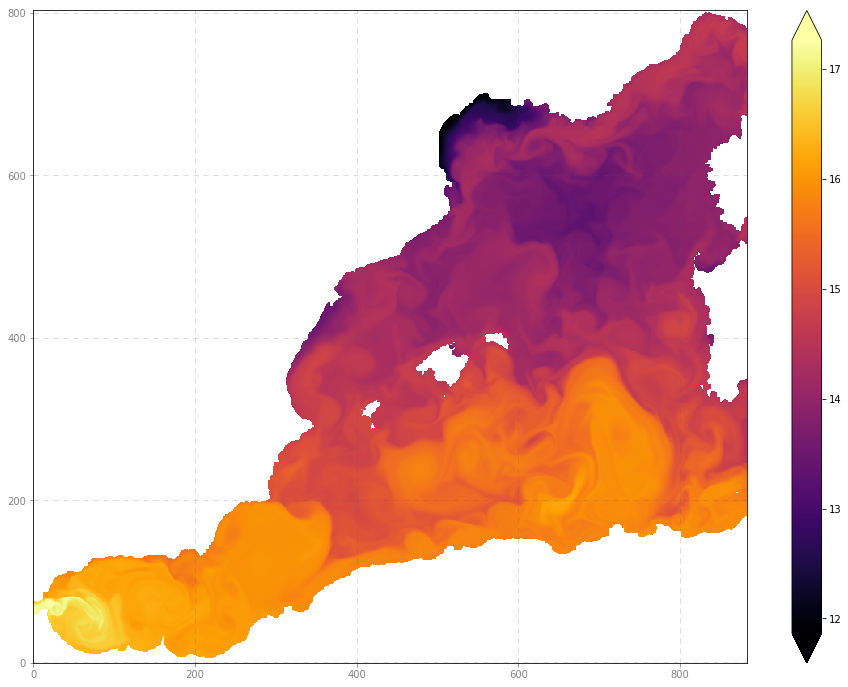

In [42]:
# Plot

fig,(ax) = plt.subplots(1, 1, figsize=[16, 12],facecolor='w')

cs  = ax.pcolormesh(data2plot,cmap='inferno')


# The lines below are for custommized grid lines
lalpha=0.2
lwidthgrid=1.
gridinc=200
lstylegrid=(0, (5, 5))
lcolorgrid="#585858" # "#D8D8D8"
tcolorgrid='#848484'#"#848484"            
ax.xaxis.set_major_locator(mticker.MultipleLocator(gridinc))
ax.yaxis.set_major_locator(mticker.MultipleLocator(gridinc))   
ax.tick_params(axis='x', colors=tcolorgrid)
ax.tick_params(axis='y', colors=tcolorgrid)
ax.grid(which='major',linestyle=lstylegrid,color=lcolorgrid,alpha=lalpha,linewidth=lwidthgrid)
ax.axhline(y=1.,xmin=0, xmax=883,zorder=10,color=lcolorgrid,linewidth=lwidthgrid,linestyle=lstylegrid,alpha=lalpha )

# add automatic colorbar
cb = fig.colorbar(cs,extend='both')    

plt.show()